# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [252]:
# Load the Breast Cancer Wisconsin dataset
breast_cancer_data, target = load_breast_cancer(as_frame=True, return_X_y=True)

In [253]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, target, test_size=0.2, random_state=0)

In [254]:
# Display first 5 rows
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [255]:
y_train.value_counts()

target
1    290
0    165
Name: count, dtype: int64

Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [256]:
# Create a Decision Tree model
decision_tree_bc_data = DecisionTreeClassifier(random_state=0, max_depth=6, min_samples_split=20, min_samples_leaf=4)
decision_tree_bc_data.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=20,
                       random_state=0)

In [257]:
score = decision_tree_bc_data.score(X_test, y_test)
print(f"The score is {round(score, 4)} (for max_depth = 6, min_samples_split=20, min_samples_leaf=4)")

The score is 0.9737 (for max_depth = 6, min_samples_split=20, min_samples_leaf=4)


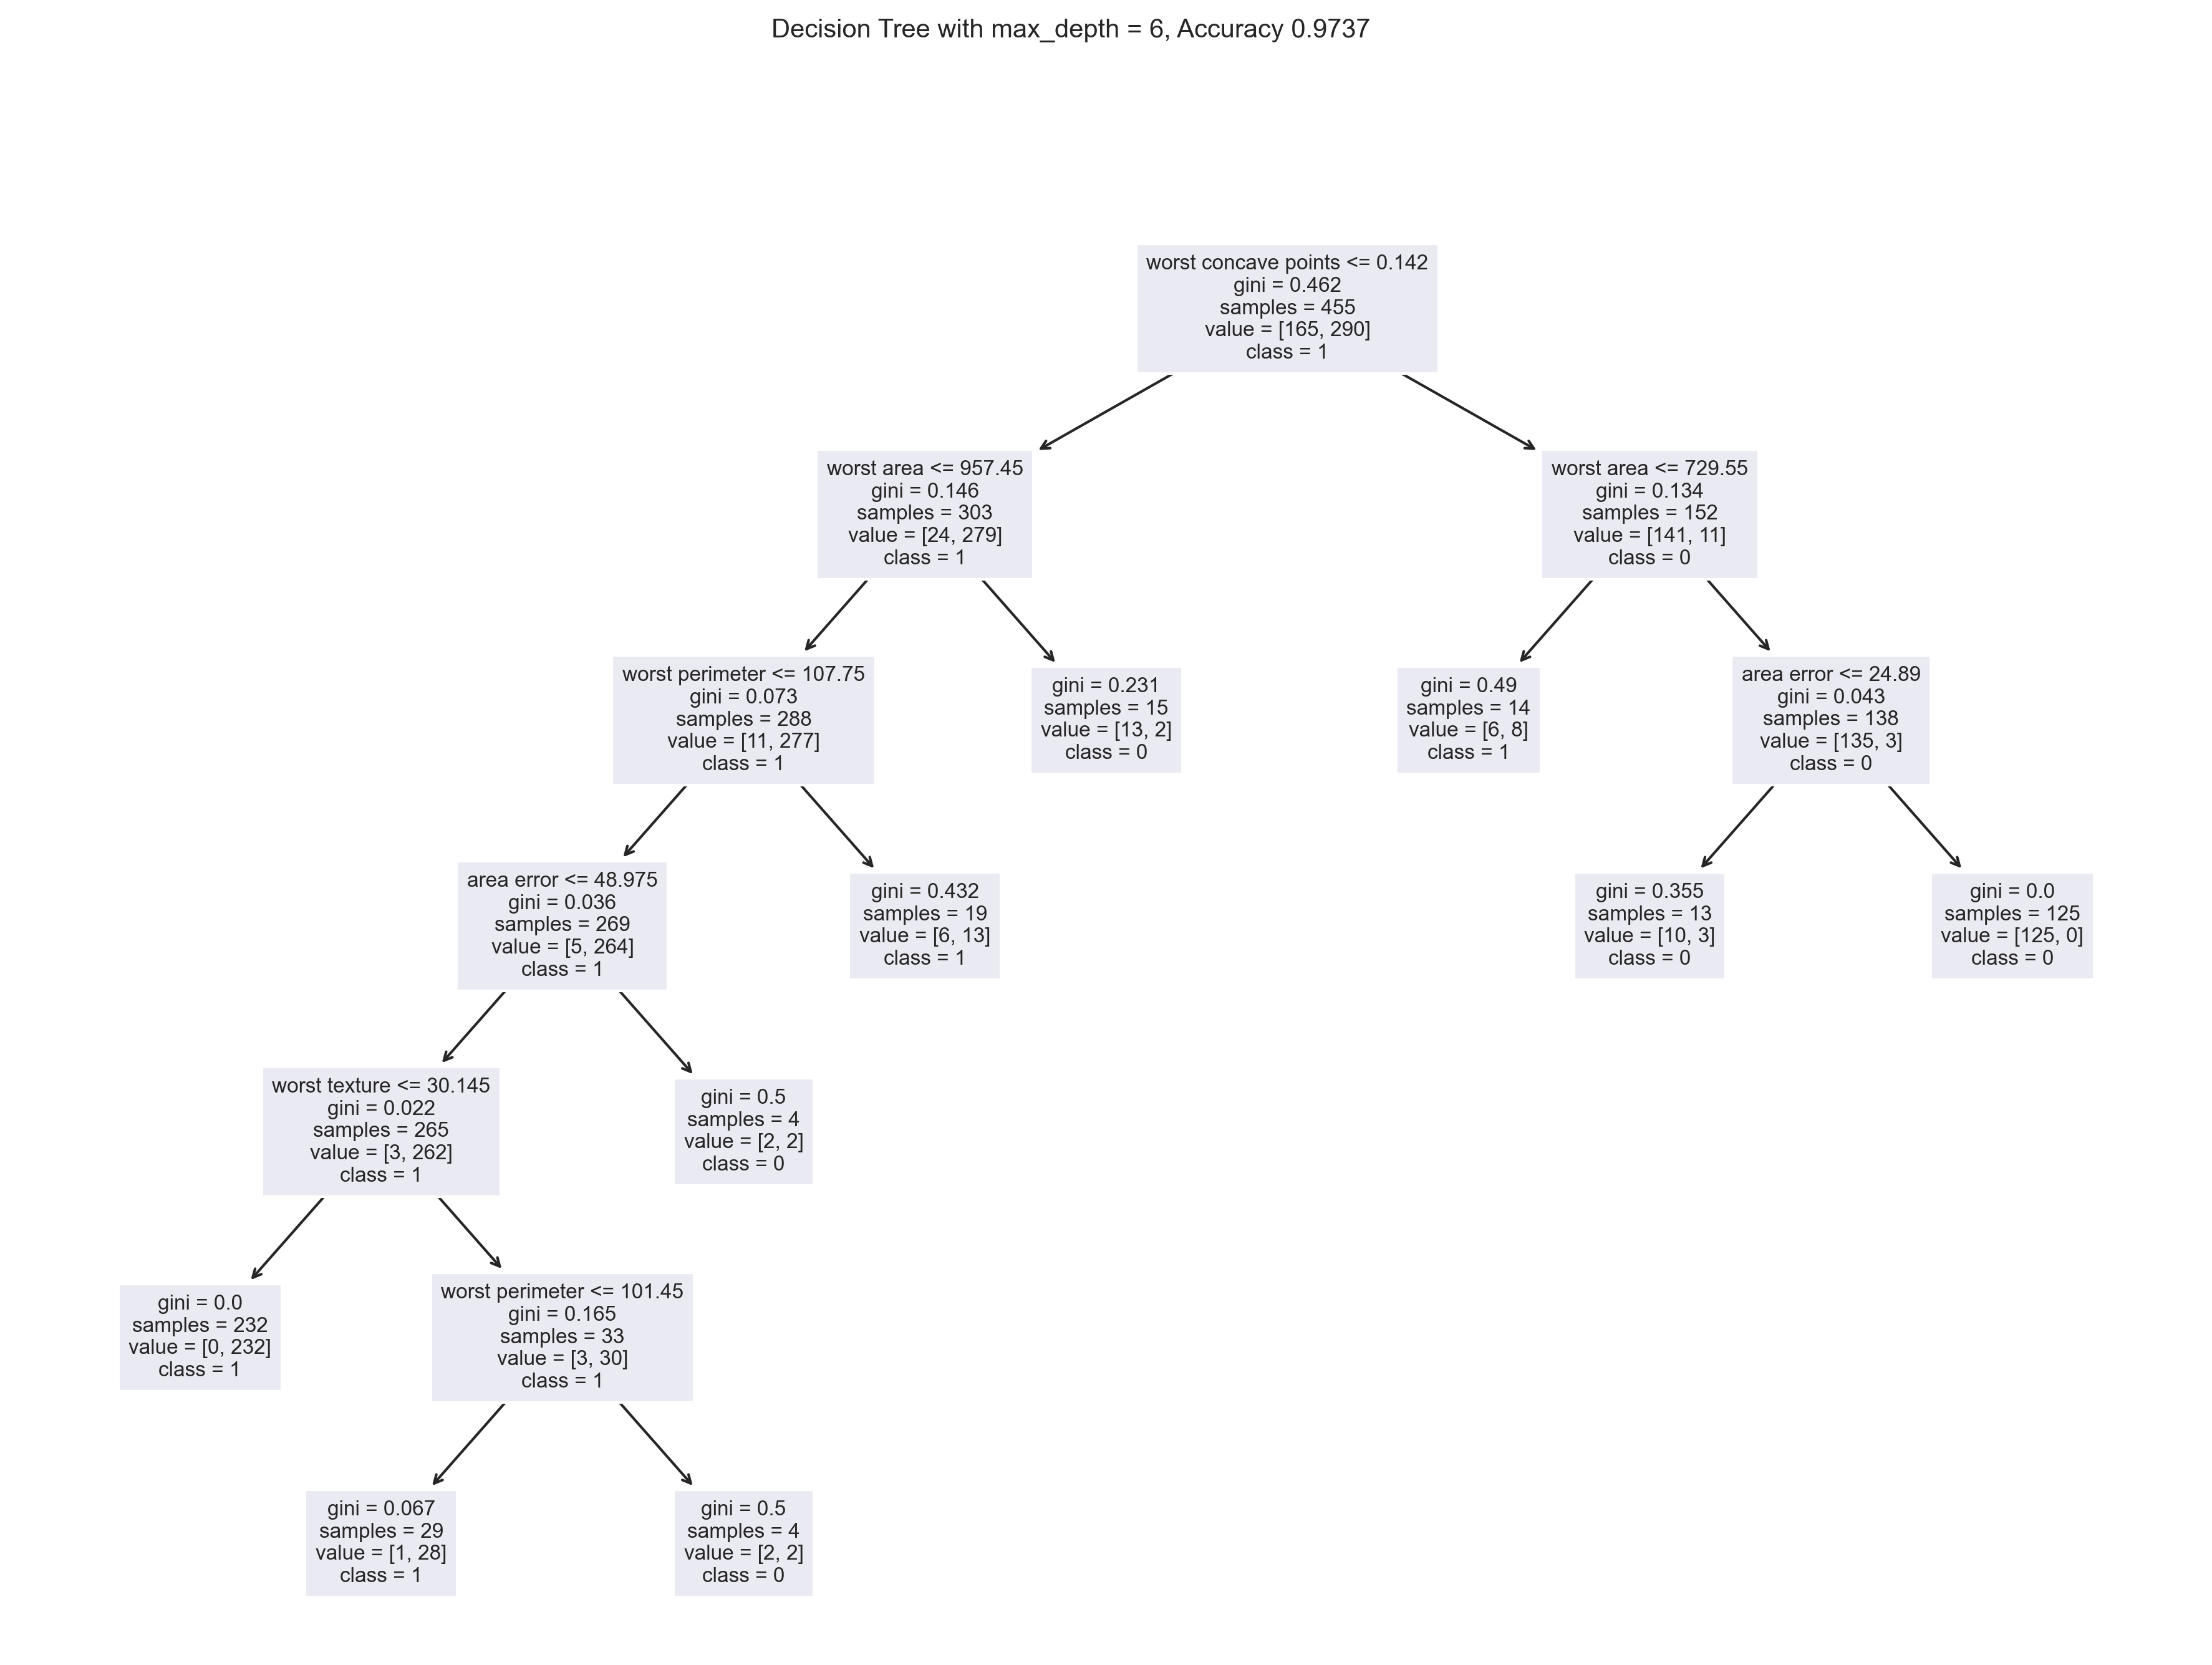

In [258]:
# Visualize the Decision Tree
from sklearn import tree
feature_names = breast_cancer_data.columns
class_names = target.unique().astype(str)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10), dpi = 300)
tree.plot_tree(decision_tree_bc_data, feature_names=feature_names, class_names=class_names, fontsize=8, ax=ax);
plt.suptitle(f"Decision Tree with max_depth = 6, Accuracy {round(score, 4)}", fontsize = 10);

# Decision Tree Classifier for max_depth = 6
- As shown in the tree plot, for max_depth = 6, classifier reaches 0.9737 accuracy for min_samples_split=20, min_samples_leaf=4. 
- The main decisive feature of the classifier is worst concave points in the feature list. 
- Some nodes show very low gini values including 0. For example, 232 samples being classified based on worst texture <= 30.145 shows gini 0. 
- Some nodes show gini 0.5 with small number of samples = 4. 

In [259]:
# Search for the highest score over max_depth for fixed min_samples_split=20, min_samples_leaf=4
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))

# List to store the mean score for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_split=20, min_samples_leaf=4)
   
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

print(accuracy)

[0.9035087719298246, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


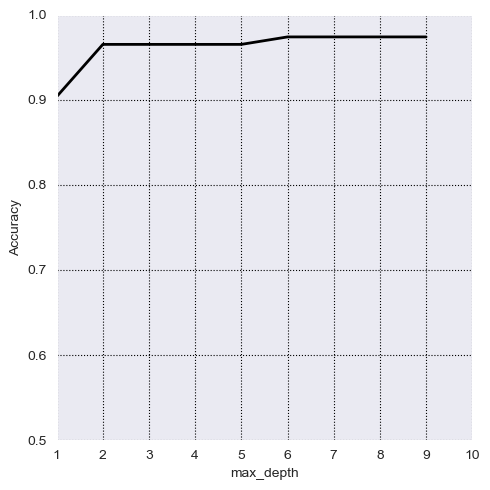

In [260]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
ax.plot(max_depth_range, accuracy, lw=2, color='k')

ax.set_xlim([1, 10])
ax.set_ylim([.50, 1.00])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')

ax.set_xlabel('max_depth', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
fig.tight_layout()

# Decision Tree Classifier Accuracy for Varying Values of max_depth
As shown in the figure, for small values of max_depth 2 reaches a very high accuracy while the accuracy increase beyond max_depth 6 is negligible (min_samples_split=20, min_samples_leaf=4). 

The score is 0.9649 (for max_depth = 2, min_samples_split=20, min_samples_leaf=4)


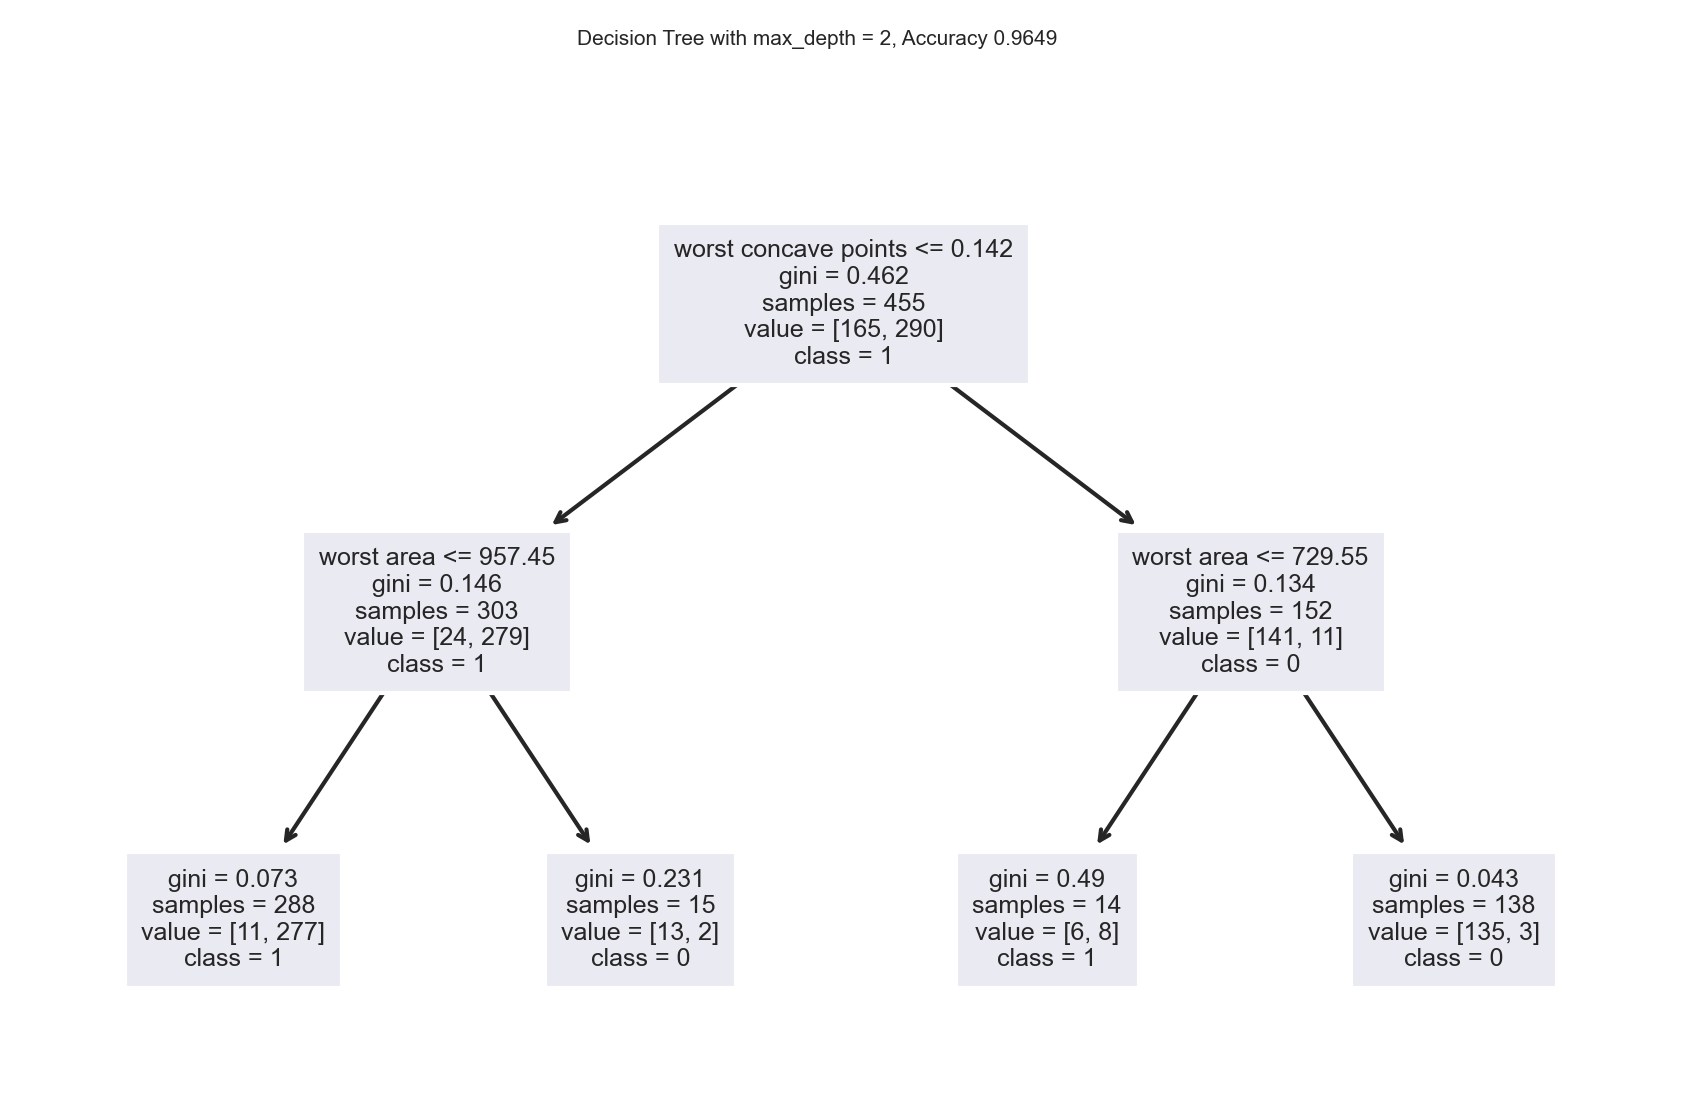

In [261]:
# Decision Tree Classifier with max_depth = 2 
clf_md2 = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_split=20, min_samples_leaf=4)
clf_md2.fit(X_train, y_train)

# Print the score Decision Tree Classifier with max_depth = 2 
score_md2 = clf_maxdepth2.score(X_test, y_test)
print(f"The score is {round(score_md2, 4)} (for max_depth = 2, min_samples_split=20, min_samples_leaf=4)")

# Visualize the tree 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 4), dpi = 300)
# ax = plt.axes()
tree.plot_tree(clf_maxdepth2, feature_names=feature_names, class_names=class_names, fontsize=6, ax=ax);
plt.suptitle(f"Decision Tree with max_depth = 2, Accuracy {round(score_md2, 4)}", fontsize = 5);

# Decision Tree Classifier for Breast Cancer Data
**Impact of depth on accuracy**: The Decision Tree Classifier with the maximum depth of the tree 6 (max_depth=6), the minimum number of samples required to split an internal node (min_samples_split=20), the minimum number of samples required to be at a leaf node (min_samples_leaf=4), achieves a mean accuracy (score) is 0.9737 (for max_depth = 6, min_samples_split=20, min_samples_leaf=4). On the other hand, when the maximum depth of the tree is reduced to 2 (with min_samples_split=20 and min_samples_leaf=4), classifier still achieves a mean accuracy (score) of 0.9649 which is significant given the number of leafs/nodes. 

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [262]:
# Train random forest model
random_forest_bc_data = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=2)
random_forest_bc_data.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=1)

In [263]:
# Extract feature importances and save to a panda dataframe
df_feature_importance = pd.DataFrame( {'feature': feature_names, 'importance': random_forest_bc_data.feature_importances_} )
print(df_feature_importance)

                    feature  importance
0               mean radius    0.063365
1              mean texture    0.015943
2            mean perimeter    0.059179
3                 mean area    0.040039
4           mean smoothness    0.001130
5          mean compactness    0.001871
6            mean concavity    0.099661
7       mean concave points    0.120487
8             mean symmetry    0.000000
9    mean fractal dimension    0.000000
10             radius error    0.023029
11            texture error    0.001207
12          perimeter error    0.003215
13               area error    0.035056
14         smoothness error    0.000593
15        compactness error    0.000558
16          concavity error    0.000884
17     concave points error    0.000000
18           symmetry error    0.000000
19  fractal dimension error    0.001513
20             worst radius    0.099830
21            worst texture    0.003894
22          worst perimeter    0.137139
23               worst area    0.107877


In [264]:
# Print feature importance in the descending order
df_feature_importance_sorted_by_importance = df_feature_importance.sort_values(by='importance', ascending=False)
print(df_feature_importance_sorted_by_importance)

                    feature  importance
27     worst concave points    0.137413
22          worst perimeter    0.137139
7       mean concave points    0.120487
23               worst area    0.107877
20             worst radius    0.099830
6            mean concavity    0.099661
0               mean radius    0.063365
2            mean perimeter    0.059179
3                 mean area    0.040039
13               area error    0.035056
10             radius error    0.023029
26          worst concavity    0.021665
1              mean texture    0.015943
25        worst compactness    0.010658
29  worst fractal dimension    0.005414
24         worst smoothness    0.004785
21            worst texture    0.003894
28           worst symmetry    0.003597
12          perimeter error    0.003215
5          mean compactness    0.001871
19  fractal dimension error    0.001513
11            texture error    0.001207
4           mean smoothness    0.001130
16          concavity error    0.000884


Text(0.5, 1.0, 'Random Foreset (Feature Importance)')

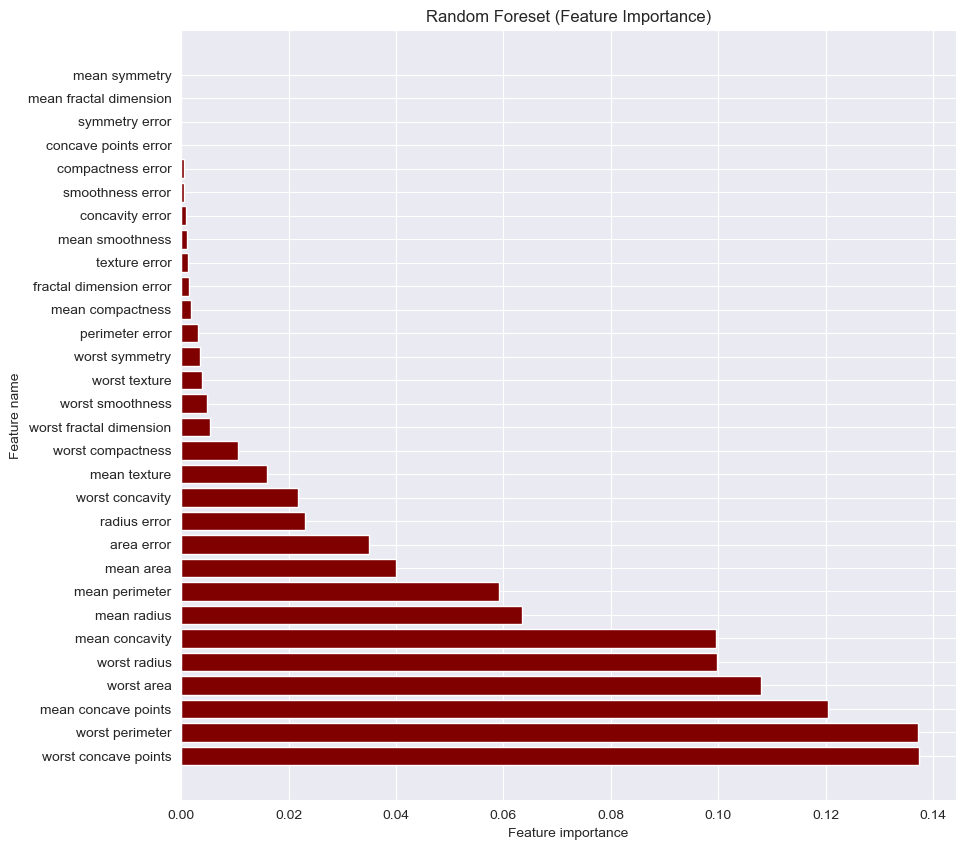

In [265]:
# Plot the feature importance in a horizontal bar graph
plt.figure(figsize=(10, 10))
plt.barh(df_feature_importance_sorted_by_importance['feature'], df_feature_importance_sorted_by_importance['importance'], color='maroon')
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.title("Random Foreset (Feature Importance)")

In [266]:
# Print the score for random forest classifier with max_depth = 2 
score_rf2 = random_forest_bc_data.score(X_test, y_test)
print(f"The score for random forest is {round(score_rf2, 4)} (for n_estimators=100, max_depth=2)")

The score for random forest is 0.9561 (for n_estimators=100, max_depth=2)


# Random Forest for Breast Cancer Data
The random forest Classifier with the maximum depth of 2 (max_depth=2), the 100 number of trees in the forest (n_estimators = 100), the model achieves a mean accuracy (score) is 0.9561). The worst concave points and worst perimeter can be considered the most important features in the model.  

AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [267]:
# Build and train an AdaBoostClassifier on your training data.
adaboost_clf_bc_data = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=1)
adaboost_clf_bc_data.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=1)

In [268]:
# Evaluate models score (mean accuracy_
score_ab2 = adaboost_clf_bc_data.score(X_test, y_test)
print(f"The score is {round(score_ab2, 4)} (for n_estimators=100, algorithm=\"SAMME\")")

The score is 0.9737 (for n_estimators=100, algorithm="SAMME")


In [269]:
# Print the AdaBoost feature importance sorted in the descending order
df_feature_importance_ab = pd.DataFrame( {'feature': feature_names, 'importance': adaboost_clf_bc_data.feature_importances_} )
df_feature_importance_ab_sorted_by_importance = df_feature_importance_ab.sort_values(by='importance', ascending=False)
print(df_feature_importance_ab_sorted_by_importance)

                    feature  importance
13               area error    0.103677
1              mean texture    0.092141
21            worst texture    0.077867
27     worst concave points    0.074824
23               worst area    0.061631
5          mean compactness    0.056797
24         worst smoothness    0.051337
26          worst concavity    0.049776
7       mean concave points    0.048091
12          perimeter error    0.046913
4           mean smoothness    0.040646
22          worst perimeter    0.034705
19  fractal dimension error    0.034174
15        compactness error    0.033621
20             worst radius    0.032173
28           worst symmetry    0.025856
18           symmetry error    0.020079
25        worst compactness    0.018730
8             mean symmetry    0.018690
16          concavity error    0.017848
14         smoothness error    0.014370
29  worst fractal dimension    0.010943
3                 mean area    0.010747
11            texture error    0.009049


Text(0.5, 1.0, 'AdaBoost Classifier (Feature Importance)')

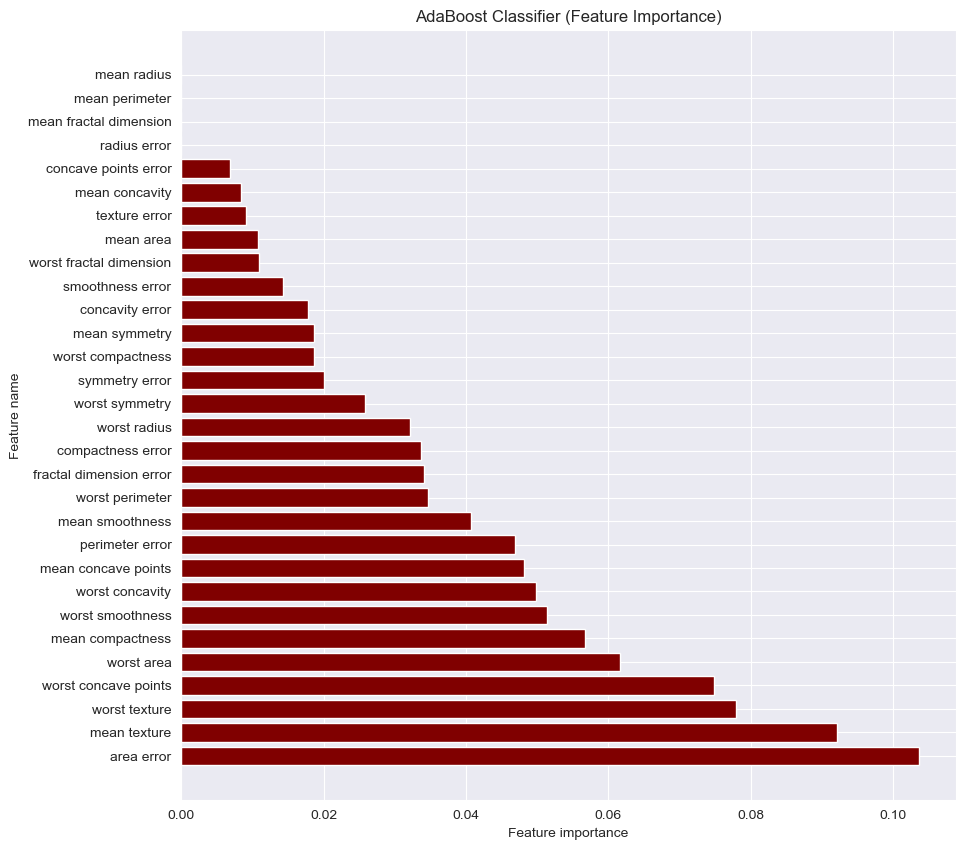

In [270]:
# Plot the feature importance of adaboost classifier in a horizontal bar graph
plt.figure(figsize=(10, 10))
plt.barh(df_feature_importance_ab_sorted_by_importance['feature'], df_feature_importance_ab_sorted_by_importance['importance'], color='maroon')
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.title("AdaBoost Classifier (Feature Importance)")

# AdaBoost classifier for Breast Cancer Data
The AdaBoost classifier with the 100 maximum number of estimators at which boosting is terminated (n_estimators = 100) and algorithm="SAMME", the model achieves a mean accuracy (score) is 0.9737. The area error can be considered as the most important features in this model.